<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E8%8E%BA%E5%B0%BE%E8%8A%B1SVM%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
## 读取数据
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'sepal length', u'sepal width', u'petal length', u'petal width'

path = 'iris.data'
data = pd.read_csv(path,header=None)
x,y =data[list(range(4))],data[4]
y = pd.Categorical(y).codes  #把文本数据进行编码，例如a,b,c,编码为0，1，2
x = x [[0,1]]
print(data)
print(x)
print(y)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
       0    1
0    5.1  3.5
1    4.9  3.0
2    4.7  3.2
3    4.6  3.1
4    5.0  3.6
..   ...  ...
145  6.7  3.0
146  6.3  2.5
147  6.5  3.0
148  6.2  3.4
149  5.9  3.0

[150 rows x 2 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=28,train_size=0.6)

# svm.SVC API说明：
# 功能：使用SVM分类器进行模型构建
# 参数说明：
# C: 误差项的惩罚系数，默认为1.0；一般为大于0的一个数字，C越大表示在训练过程中对于总误差的关注度越高，也就是说当C越大的时候，对于训练集的表现会越好，
# 但是有可能引发过度拟合的问题(overfiting)
# kernel：指定SVM内部函数的类型，可选值：linear、poly、rbf、sigmoid、precomputed(基本不用，有前提要求，要求特征属性数目和样本数目一样)；默认是rbf；
# degree：当使用多项式函数作为svm内部的函数的时候，给定多项式的项数，默认为3
# gamma：当SVM内部使用poly、rbf、sigmoid的时候，核函数的系数值，当默认值为auto的时候，实际系数为1/n_features
# coef0: 当核函数为poly或者sigmoid的时候，给定的独立系数，默认为0
# probability：是否启用概率估计，默认不启动，不太建议启动
# shrinking：是否开启收缩启发式计算，默认为True
# tol: 模型构建收敛参数，当模型的的误差变化率小于该值的时候，结束模型构建过程，默认值:1e-3
# cache_size：在模型构建过程中，缓存数据的最大内存大小，默认为空，单位MB
# class_weight：给定各个类别的权重，默认为空
# max_iter：最大迭代次数，默认-1表示不限制
# decision_function_shape: 决策函数，可选值：ovo和ovr，默认为None；推荐使用ovr；（1.7以上版本才有）

In [ ]:
## 数据SVM分类器构建
clf = svm.SVC(C=1, kernel='linear')

## 模型训练
clf.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
##计算模型的准确率
print(clf.score(x_train,y_train))
print('训练数据集准确率',accuracy_score(y_train,clf.predict(x_train)))
print(clf.score(x_test,y_test))
print('测试集准确率',accuracy_score(y_test,clf.predict(x_test)))

##计算决策函数的结构值以及预测值（decision function计算的是样本x到各个分割平面的距离，即决策函数的值 ）
print('decision_function:\n',clf.decision_function(x_train))
print('\n predict:\n',clf.predict(x_train))
# print(clf.decision_function(x_train).sum(axis=1))

0.8222222222222222
训练数据集准确率 0.8222222222222222
0.7833333333333333
测试集准确率 0.7833333333333333
decision_function:
 [[-0.23528713  2.22696954  1.07000754]
 [ 2.21191029 -0.20544117  0.95935687]
 [-0.23363232  2.23532379  0.98181585]
 [ 2.23910114  1.05479786 -0.24406589]
 [-0.2873954   1.19442184  2.27641708]
 [ 2.2683316   0.77750906 -0.22652297]
 [ 2.27648717  0.89322281 -0.27151878]
 [ 2.23910114  1.05479786 -0.24406589]
 [ 1.110082    2.22918072 -0.24308512]
 [-0.28979138  1.25763017  2.25494417]
 [ 2.23599567  0.91588297 -0.2253529 ]
 [-0.20256553  2.23131519  0.86065174]
 [-0.23843725  2.20511029  1.15908489]
 [ 2.27537162  0.83287066 -0.2630892 ]
 [-0.27451953  1.17701024  2.25983528]
 [-0.20810968  2.21137308  0.97783635]
 [ 2.24480371  0.86609126 -0.22558896]
 [-0.14907462  0.97816113  2.15594916]
 [ 2.20382289  0.89326675 -0.17481263]
 [ 2.26199174  0.92895821 -0.25760168]
 [-0.242853    2.24408695  0.98384401]
 [-0.12280758  2.16653438  0.90222525]
 [ 2.1944574   1.24076791 -0.2

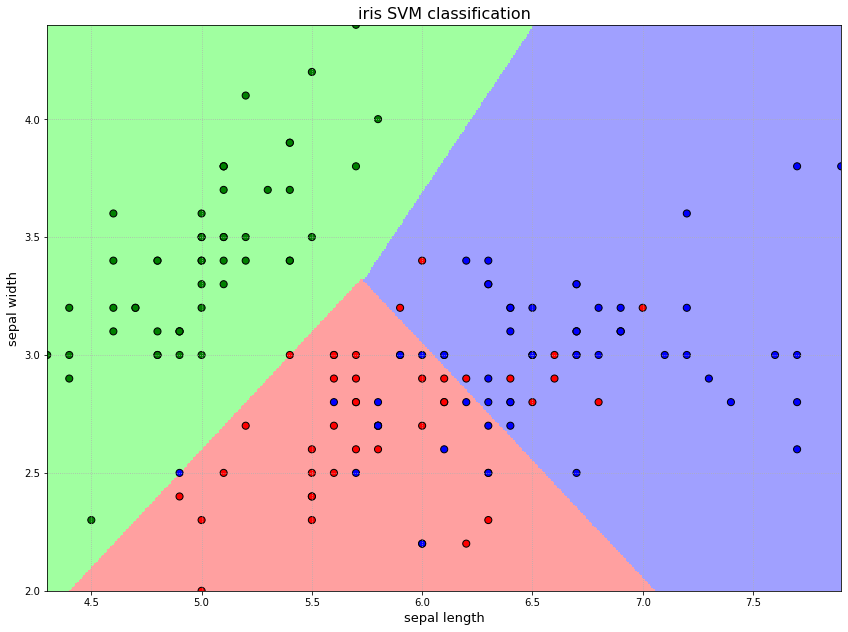

In [ ]:
#画图
N=500
x1_min,x2_min = x.min()
x1_max,x2_max = x.max()

t1 = np.linspace(x1_min,x1_max,N)
t2 = np.linspace(x2_min,x2_max,N)
x1,x2 = np.meshgrid(t1,t2) #生成网络采样点
grid_show = np.dstack((x1.flat,x2.flat))[0] #测试点
# print(grid_show)
grid_hat = clf.predict(grid_show)   # 预测分类值
grid_hat = grid_hat.reshape(x1.shape) #使之与输入的形状相同
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w',figsize=(12,9))
##区域图
plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)
##所有样本点
plt.scatter(x[0],x[1],c=y,edgecolors='k',s=50,cmap=cm_dark)
##测试数据集
plt.scatter(x_test[0],x_test[1],s=120,facecolor='none',zorder=10)
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'iris SVM classification', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
## Linear分类器构建
lr = LogisticRegression()
rc = RidgeClassifier() # ridge 是为了解决特征大于样本数，而导致分类效果较差的情况而提出的
knn = KNeighborsClassifier()

## 模型训练
lr.fit(x_train, y_train)
rc.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
### 效果评估
svm_score1 = accuracy_score(y_train, clf.predict(x_train))
svm_score2 = accuracy_score(y_test, clf.predict(x_test))

lr_score1 = accuracy_score(y_train, lr.predict(x_train))
lr_score2 = accuracy_score(y_test, lr.predict(x_test))

rc_score1 = accuracy_score(y_train, rc.predict(x_train))
rc_score2 = accuracy_score(y_test, rc.predict(x_test))

knn_score1 = accuracy_score(y_train, knn.predict(x_train))
knn_score2 = accuracy_score(y_test, knn.predict(x_test))

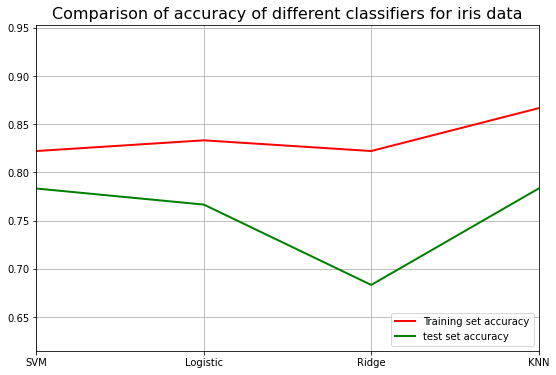

In [30]:
## 画图
x_tmp = [0,1,2,3]
y_score1 = [svm_score1, lr_score1, rc_score1, knn_score1]
y_score2 = [svm_score2, lr_score2, rc_score2, knn_score2]

plt.figure(facecolor='w',figsize=(9,6))
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'Training set accuracy')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'test set accuracy')
plt.xlim(0, 3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower right')
plt.title(u'Comparison of accuracy of different classifiers for iris data', fontsize=16)
plt.xticks(x_tmp, [u'SVM', u'Logistic', u'Ridge', u'KNN'], rotation=0)
plt.grid(b=True)
plt.show()

In [31]:
## 获取各个不同算法的测试值
svm_grid_hat = clf.predict(grid_show)
svm_grid_hat = svm_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

lr_grid_hat = lr.predict(grid_show)
lr_grid_hat = lr_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

rc_grid_hat = rc.predict(grid_show)
rc_grid_hat = rc_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

knn_grid_hat = knn.predict(grid_show)
knn_grid_hat = knn_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

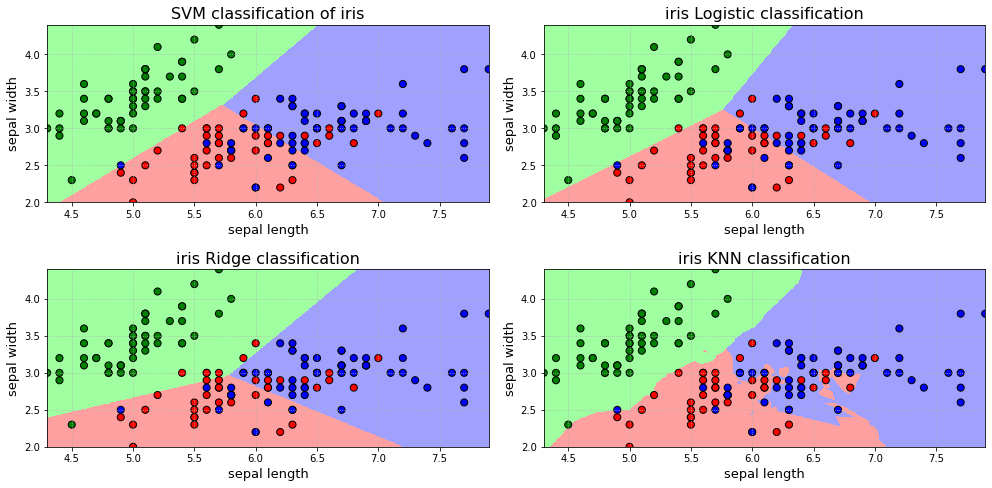

In [33]:
## 画图
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))
### svm
plt.subplot(221)
## 区域图
plt.pcolormesh(x1, x2, svm_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'SVM classification of iris', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(222)
## 区域图
plt.pcolormesh(x1, x2, lr_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'iris Logistic classification', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(223)
## 区域图
plt.pcolormesh(x1, x2, rc_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'iris Ridge classification', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(224)
## 区域图
plt.pcolormesh(x1, x2, knn_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'iris KNN classification', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.show()
